In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [2]:
dataset_dir = "dataset"

dir_list = os.listdir(dataset_dir)
print("Files and directories in '", dataset_dir, "' :")
# prints all files
print(dir_list)

Files and directories in ' dataset ' :
['Internal Test Set', 'preprocessed_images', 'External Test Set', 'Set2-Training&Validation Sets ANN Scoring system', 'ObjectDetection.xlsx', 'segmentations', 'Set1-Training&Validation Sets CNN']


In [3]:
metadata_path = '/ObjectDetection.xlsx'
df_metadata = pd.read_excel(dataset_dir + metadata_path)

# Convert h_min, w_min, h_max, w_max to integers
for col in ['h_min', 'w_min', 'h_max', 'w_max']:
    df_metadata[col] = df_metadata[col].astype(int)

display(df_metadata)

fname   structure  h_min  w_min  h_max  w_max
0      168.png     thalami    178    171    244    261
1      168.png  nasal bone     96    308    111    349
2      168.png      palate    133    300    205    408
3      168.png  nasal skin     86    324     95    349
4      168.png   nasal tip     79    345     89    376
...        ...         ...    ...    ...    ...    ...
9428  1577.png   nasal tip    134    363    142    385
9429  1577.png          NT    354    240    374    392
9430  1577.png      palate    169    317    219    407
9431  1577.png     thalami    192    217    244    281
9432  1577.png    midbrain    244    204    316    257

[9433 rows x 6 columns]

In [5]:
n_unique_files = df_metadata['fname'].nunique()
print(f"Number of unique files: {n_unique_files}")

Number of unique files: 1131


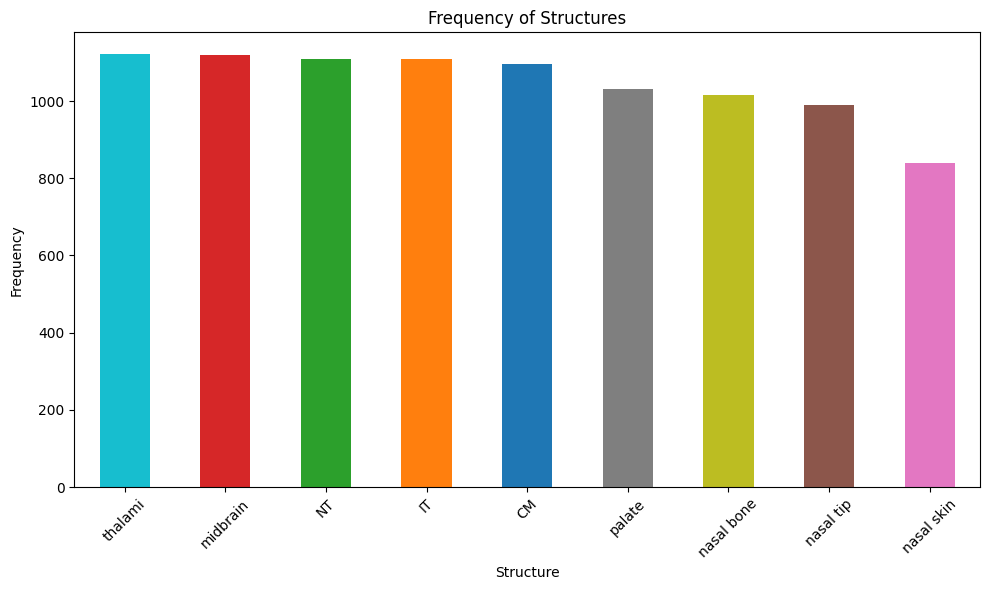

In [11]:
# Define a color for each unique structure by cycling through a qualitative colormap
unique_structures = df_metadata['structure'].unique()
unique_structures = unique_structures[::-1]
colors = plt.get_cmap('tab10', len(unique_structures))
color_map = {structure: colors(i) for i, structure in enumerate(unique_structures)}

# bar chart with frequencies of each structure using the colots
structure_counts = df_metadata['structure'].value_counts()
plt.figure(figsize=(10, 6))
structure_counts.plot(kind='bar', color=[color_map[structure] for structure in structure_counts.index])
plt.title('Frequency of Structures')
plt.xlabel('Structure')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

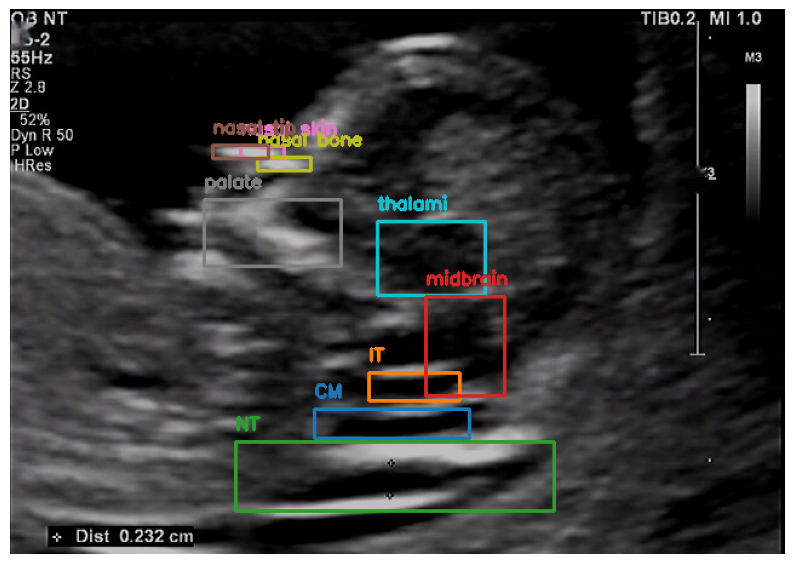

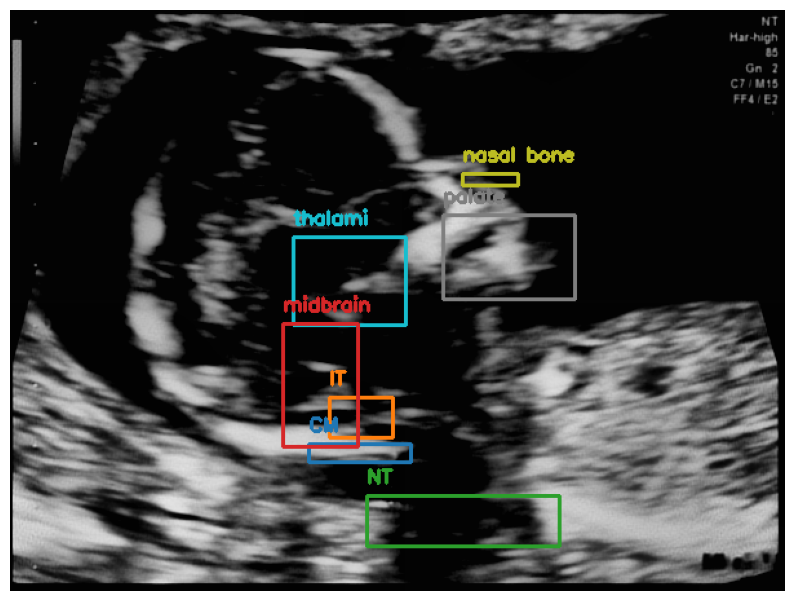

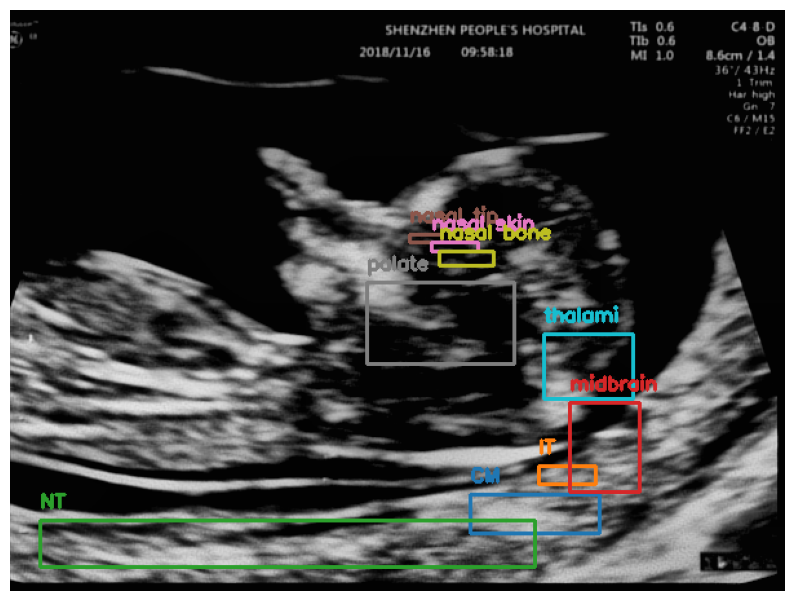

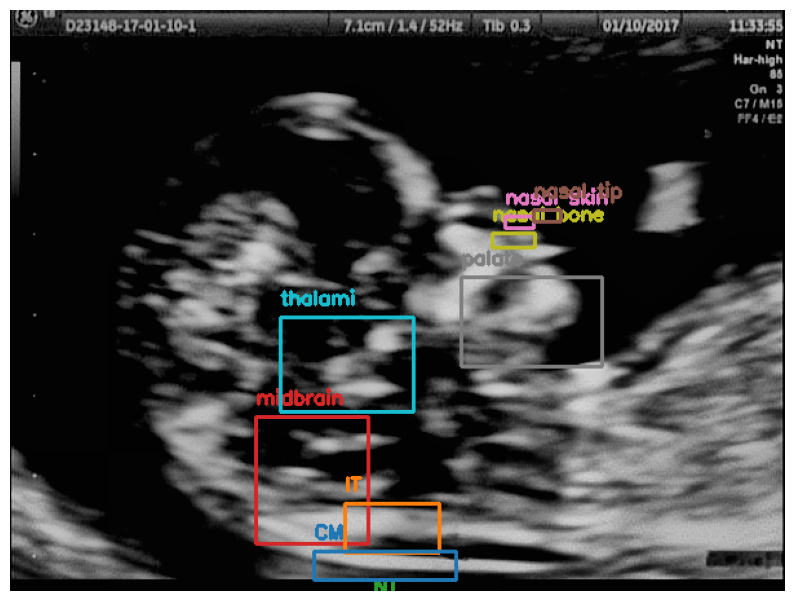

No metadata found for image: 1487.png


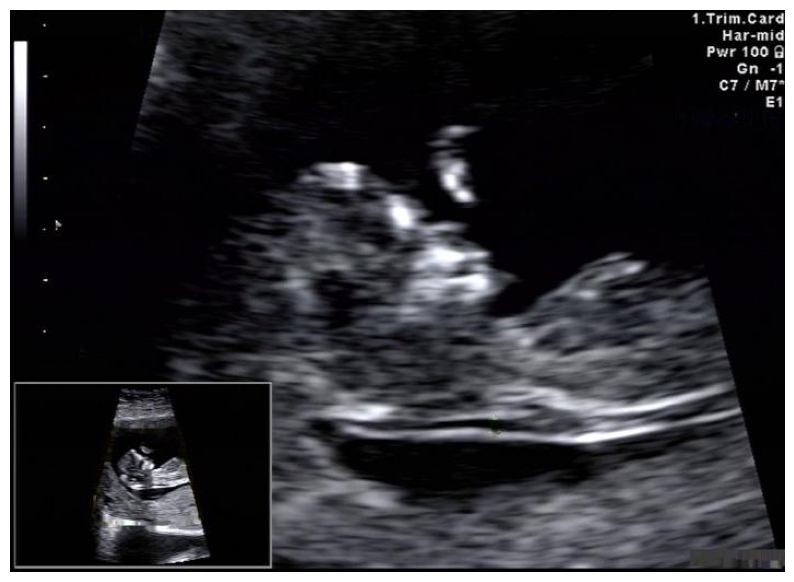

No metadata found for image: 1419.png


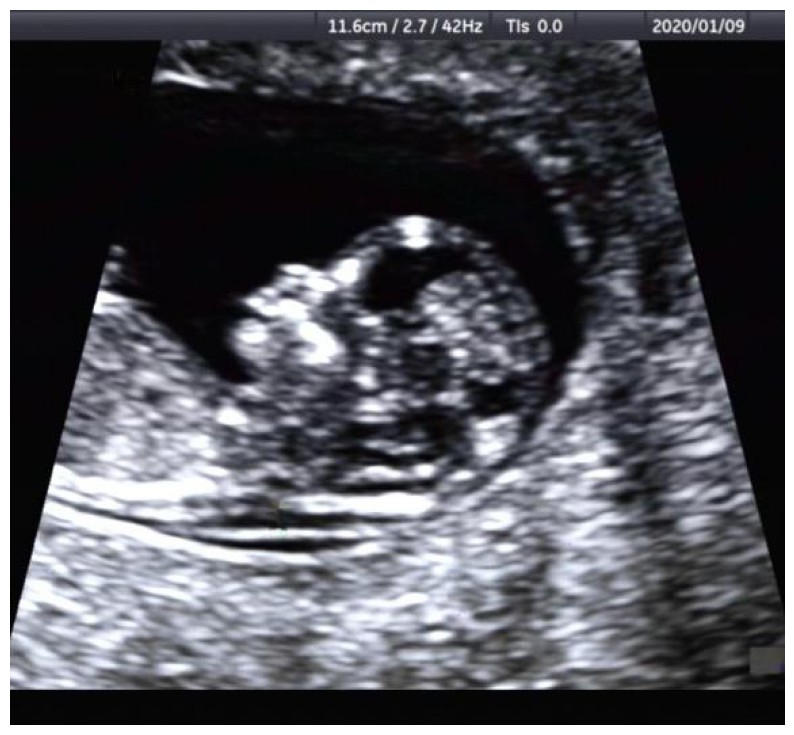

No metadata found for image: 1171.png


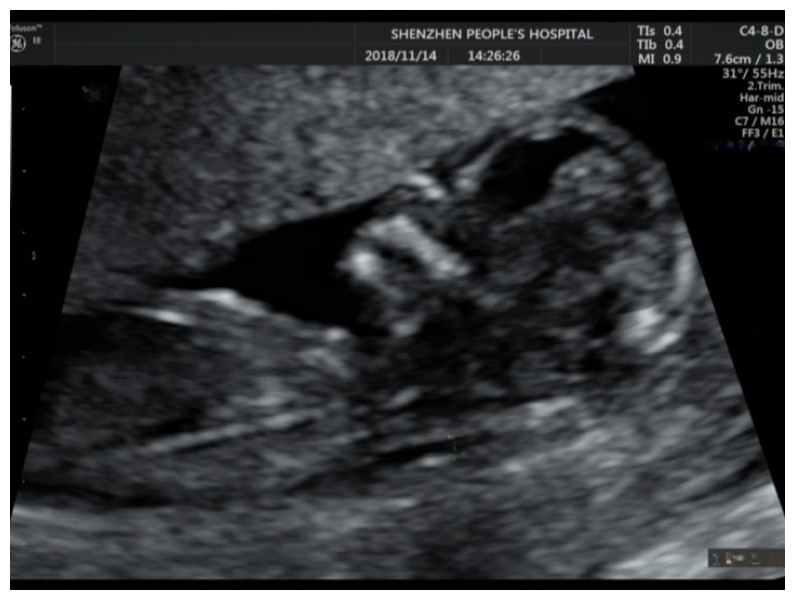

No metadata found for image: 1150.png


No metadata found for image: 1287.png


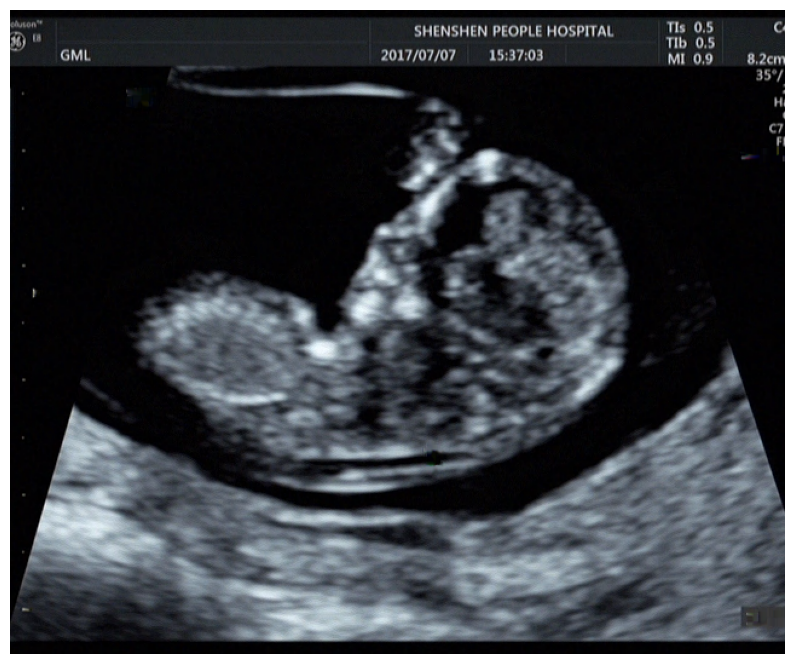

Total images processed: 1684


In [10]:
# Loop through images in the dataset, get the coordinates from the metadata, and draw rectangles
segmentation_dir = os.path.join(dataset_dir, 'segmentations')
seen_ids = []

count = 0
for root, _, files in os.walk(dataset_dir):
	if root == segmentation_dir:
		continue
	for img in files:
		if img.endswith('.png'):
			# Check if the image has already been processed
			if img in seen_ids:
				continue
			seen_ids.append(img)
			count += 1
			
			# Read the image
			image_path = os.path.join(root, img)
			image = cv2.imread(image_path)

			# Get the metadata for the current image
			metadata = df_metadata[df_metadata['fname'] == img]

			# Skip using count
			if count % 100 != 0:
				continue

			# Draw rectangles for each row in the metadata
			if not metadata.empty:  # Check if metadata is not empty
				for index, row in metadata.iterrows():
					x_min = row['w_min']
					y_min = row['h_min']
					x_max = row['w_max']
					y_max = row['h_max']

					# Convert RGBA to BGR and scale to 0-255
					rgba_color = color_map[row['structure']]
					bgr_color = tuple(int(c * 255) for c in rgba_color[:3][::-1])  # Reverse RGB to BGR

					# Draw rectangle on the image
					cv2.rectangle(image, (x_min, y_min), (x_max, y_max), bgr_color, 2)

					# Label the rectangle with the structure name
					label = row['structure']
					cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, bgr_color, 2)
			else:
				print(f"No metadata found for image: {img}")

			# Display the image with rectangles
			plt.figure(figsize=(10, 10))
			plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
			plt.axis('off')
			plt.show()

print(f"Total images processed: {count}")